## Exploratory Data Analysis into Video Game Sales
by [Joe Foster](https://www.kaggle.com/joefoster99)

Dataset : [Video Game Sales](https://www.kaggle.com/datasets/gregorut/videogamesales)

**Table of Contents**
1. [Cleaning](#1)

2. [Count Plots](#2)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


**Prep Work:**

In [2]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.info 

<bound method DataFrame.info of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sal

In [6]:
df.shape

(16598, 11)

In [7]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

Checking for duplicates

In [8]:
df.duplicated().sum()

0

<a id ="1"></a>
#### Cleaning:

Finding columns that have null values:

In [9]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Dropping the data with the null values from the dataset 

In [10]:
df.dropna(subset = ['Year'], inplace=True)
df.dropna(subset = ['Publisher'], inplace=True)

<a id ="2"></a>
#### Count Plots:

The top 10 publishers in how many games they have published

<AxesSubplot: xlabel='Publisher', ylabel='count'>

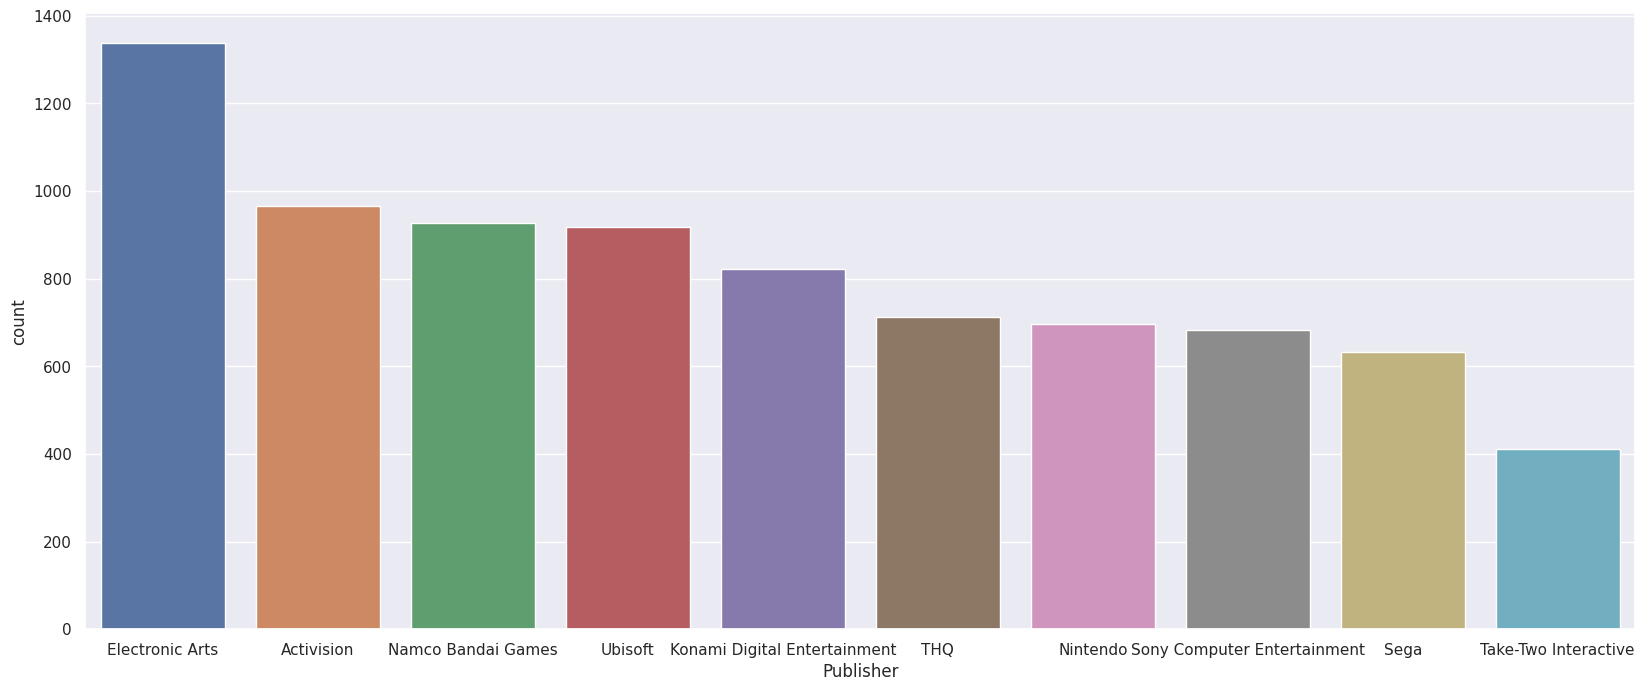

In [11]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(20 ,8 ))
sns.countplot(data = df, x = 'Publisher', order = df['Publisher'].value_counts().index[0:10])

The top 10 genres in how many games

<AxesSubplot: xlabel='Genre', ylabel='count'>

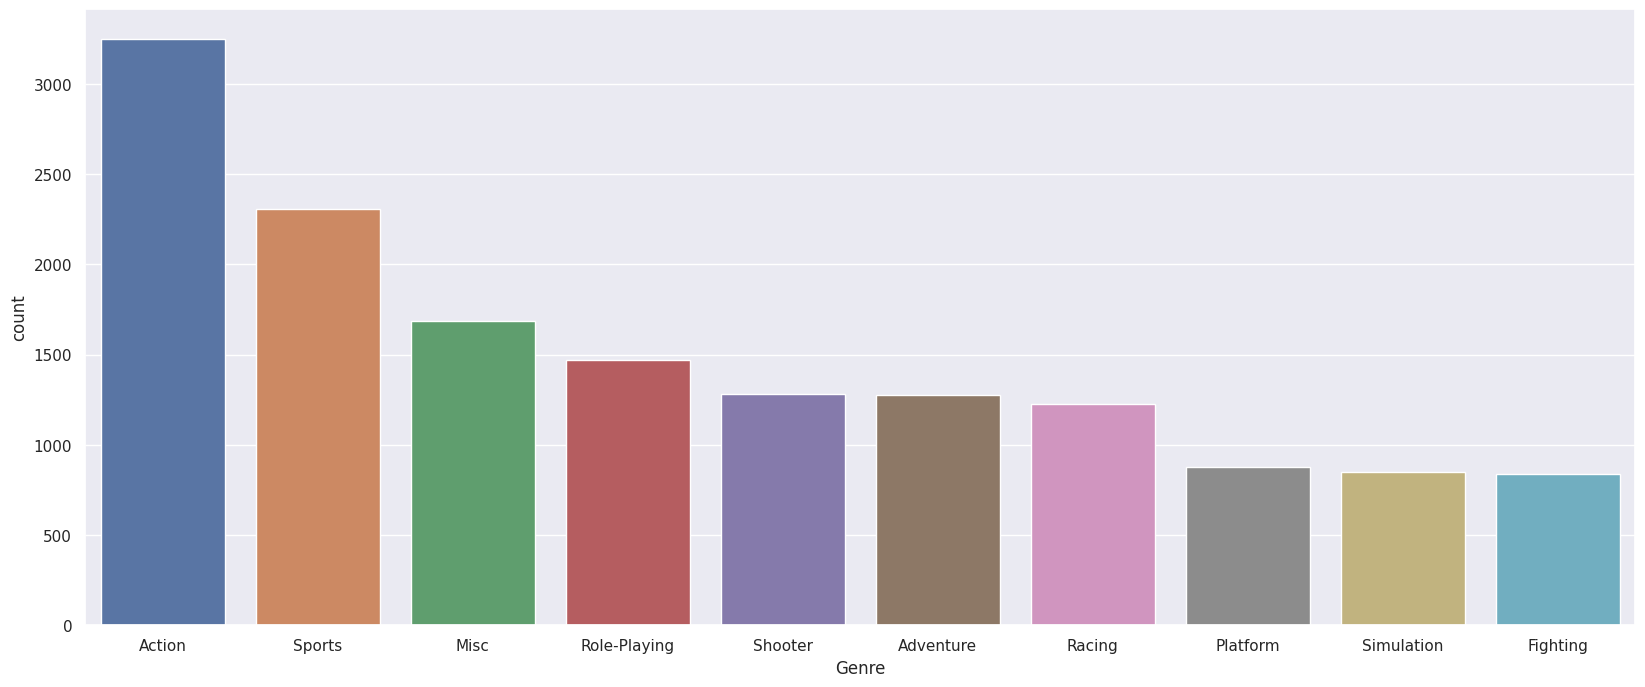

In [12]:
plt.figure(figsize=(20 ,8 ))
sns.countplot(data = df, x = 'Genre', order = df['Genre'].value_counts().index[0:10])

The top 10 platforms in how many games use them

<AxesSubplot: xlabel='Platform', ylabel='count'>

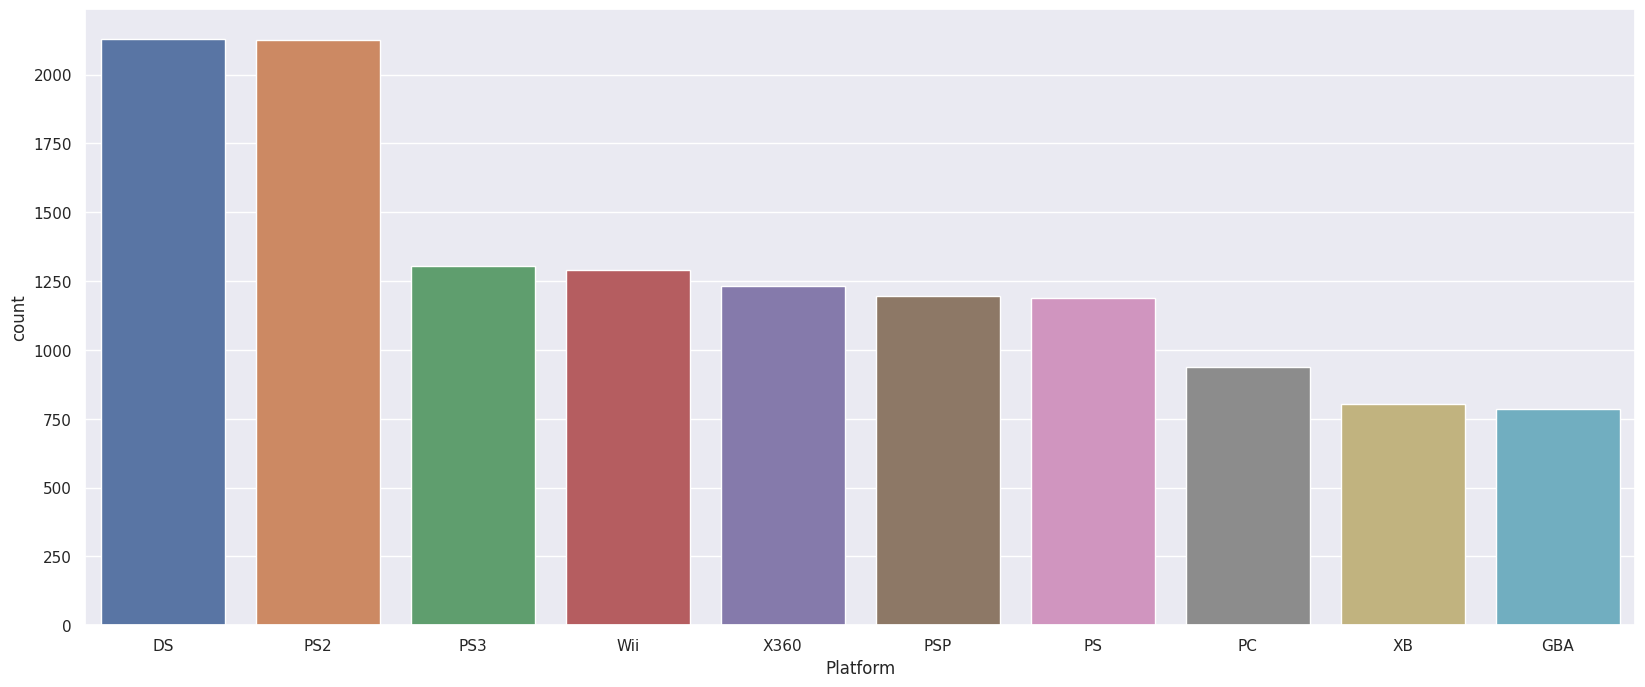

In [13]:
plt.figure(figsize=(20 ,8 ))
sns.countplot(data = df, x = 'Platform', order = df['Platform'].value_counts().index[0:10])

**Top 10 Games in Sales in all regions:**

Sorting sales by highest amount in each region 

In [14]:
df_top_games = df[['Name', 'Global_Sales', 'Publisher']].sort_values('Global_Sales',ascending=False).head(10)
df_top_games_NA = df[['Name', 'NA_Sales', 'Publisher']].sort_values('NA_Sales',ascending=False).head(10)
df_top_games_EU = df[['Name', 'EU_Sales', 'Publisher']].sort_values('EU_Sales',ascending=False).head(10)
df_top_games_JP = df[['Name', 'JP_Sales', 'Publisher']].sort_values('JP_Sales',ascending=False).head(10)

[Text(0.5, 1.0, 'Top 10 Games by Japanese Sales in the Millions')]

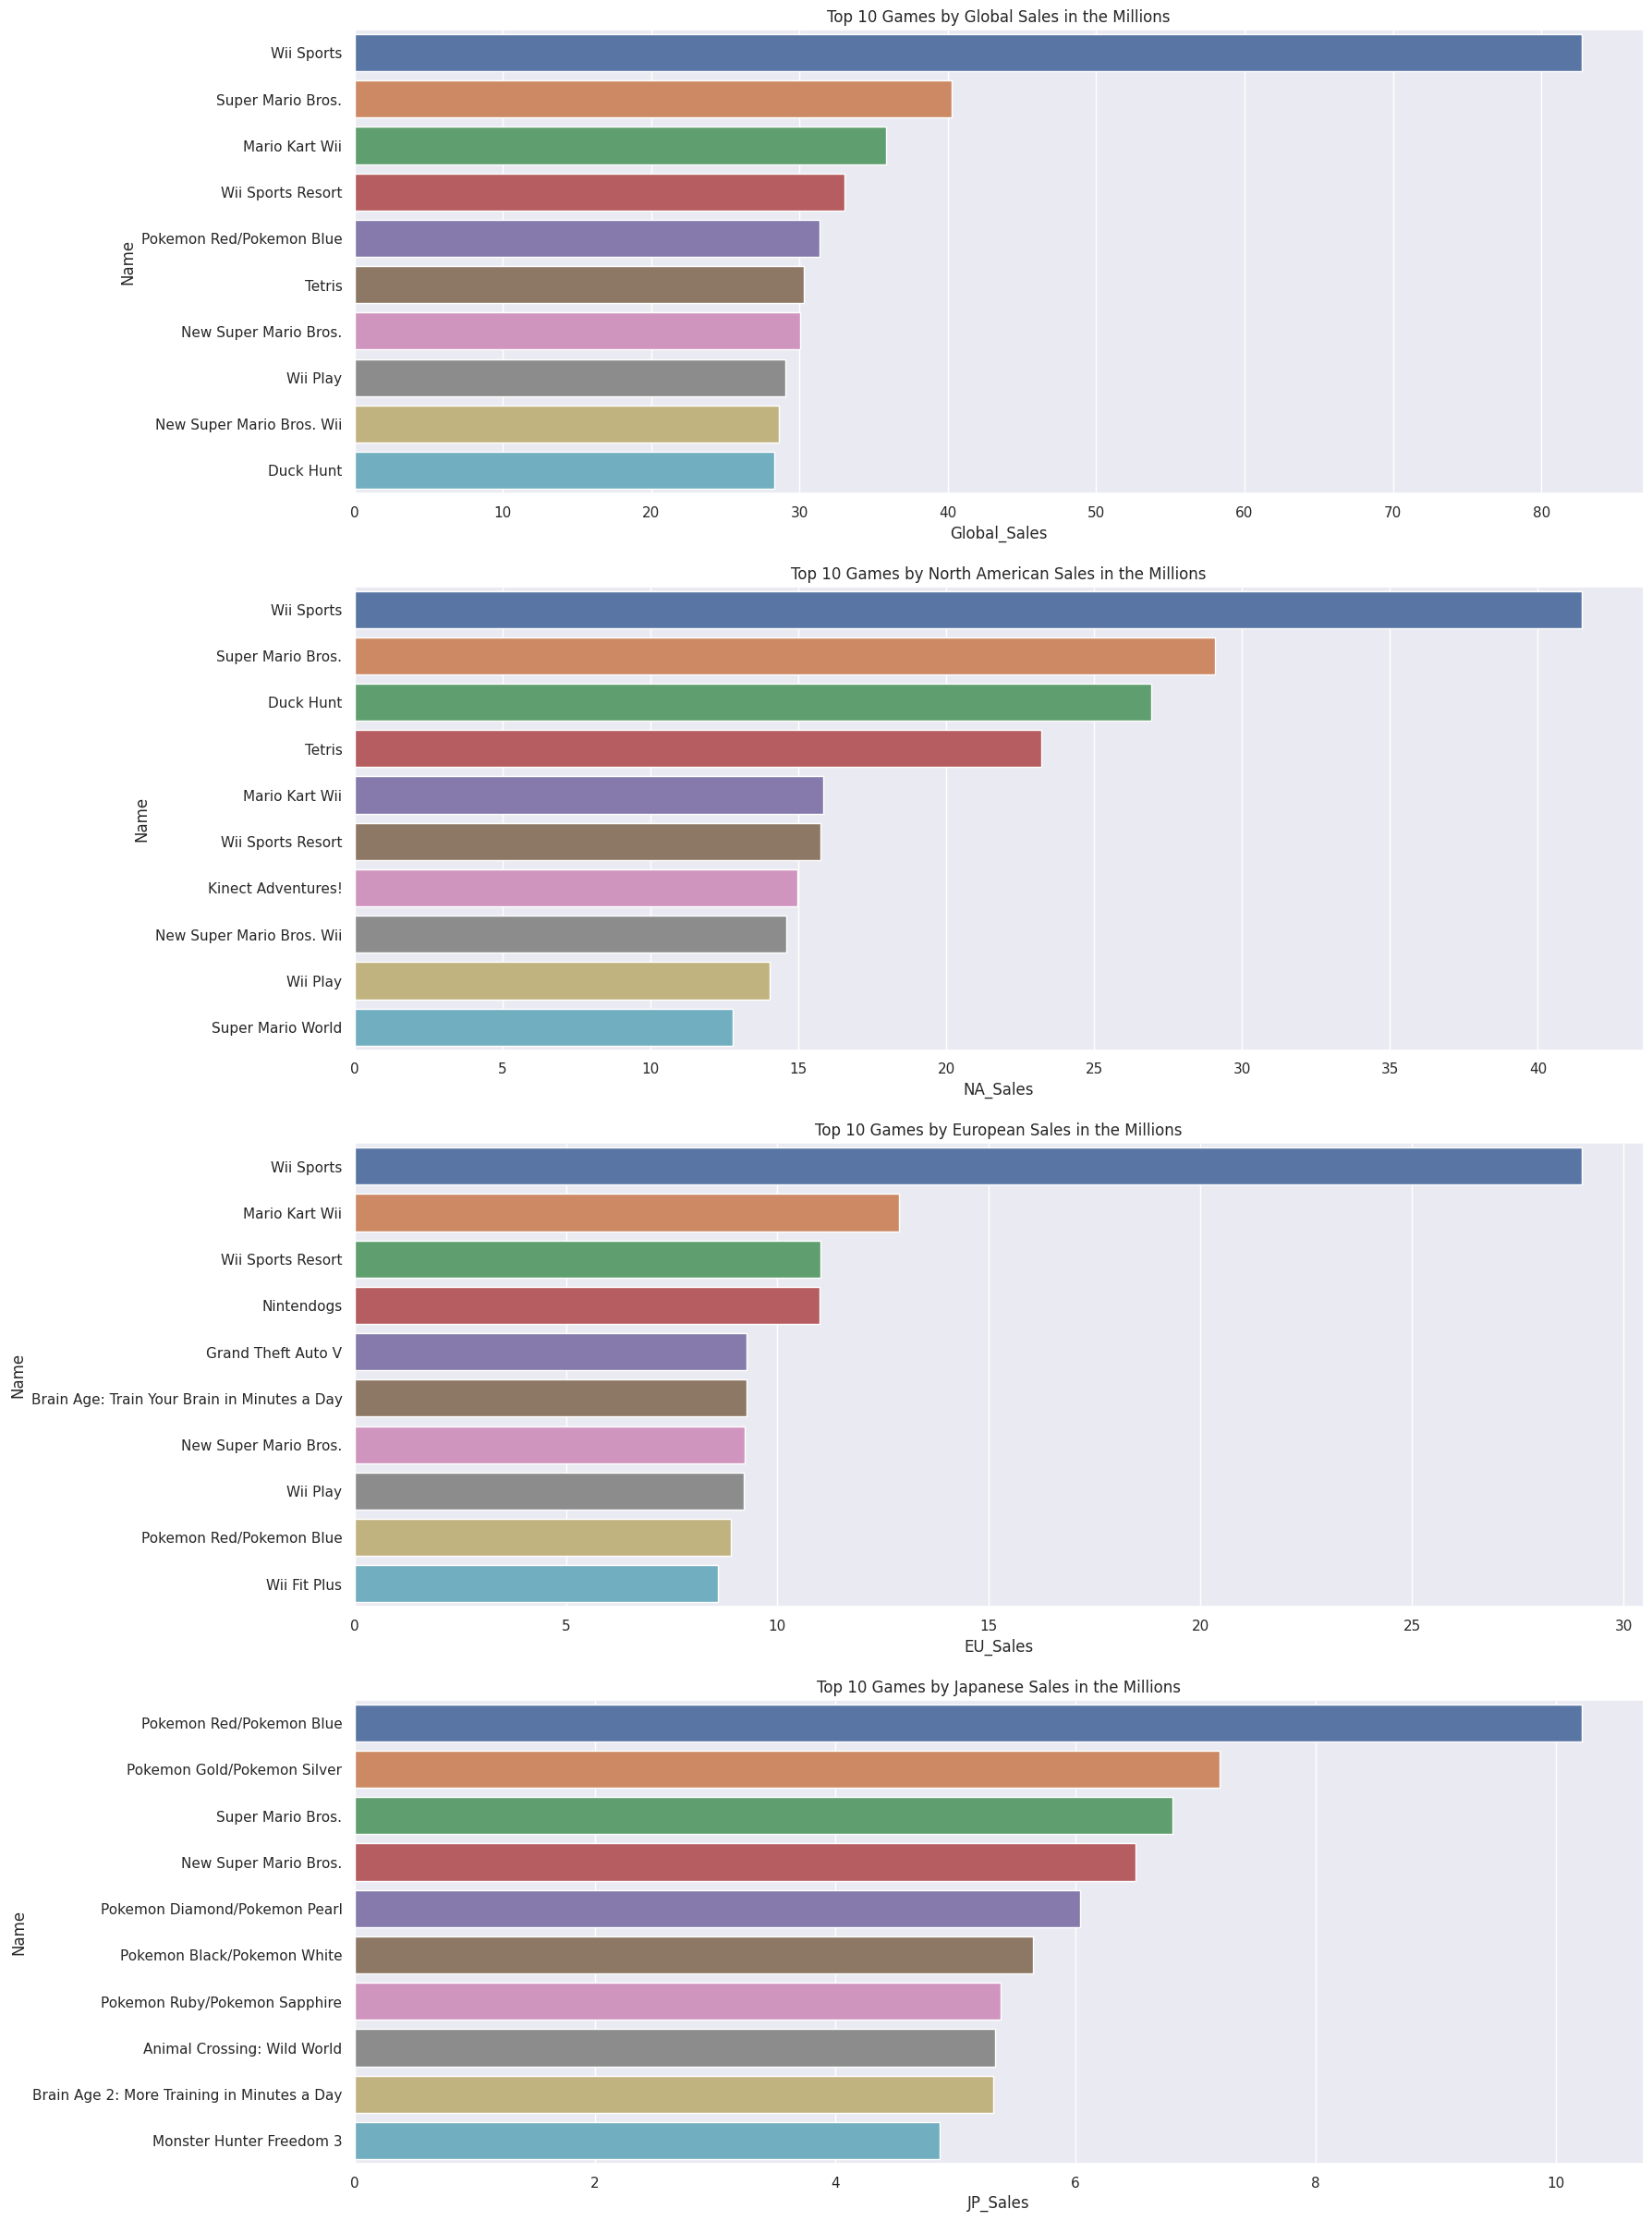

In [15]:
f, ax = plt.subplots(4,1, figsize = (18,30))

sns.barplot(data = df_top_games, x = 'Global_Sales', y = 'Name', orient = 'h', ax = ax[0]).set(title = 'Top 10 Games by Global Sales in the Millions')
sns.barplot(data = df_top_games_NA, x = 'NA_Sales', y = 'Name', orient = 'h', ax = ax[1]).set(title = 'Top 10 Games by North American Sales in the Millions')
sns.barplot(data = df_top_games_EU, x = 'EU_Sales', y = 'Name', orient = 'h', ax = ax[2]).set(title = 'Top 10 Games by European Sales in the Millions')
sns.barplot(data = df_top_games_JP, x = 'JP_Sales', y = 'Name', orient = 'h', ax = ax[3]).set(title = 'Top 10 Games by Japanese Sales in the Millions')

A few interesting notes from these graphs. 
1. Wii Sports is the top selling game in all regions other than Japan where it doesn't even break the top 10 
2. The top 5 sold games globally are all Nintendo published games
3. All but one of the top selling games in Japan are made by Nintendo 
4. North America acounts for almost all of the sales for the game Duck Hunt